In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() 

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

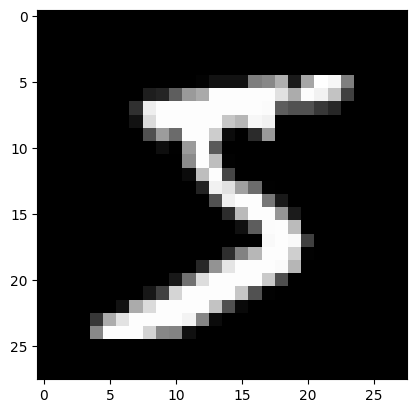

In [5]:
plt.imshow(X_train[0],cmap='gray')

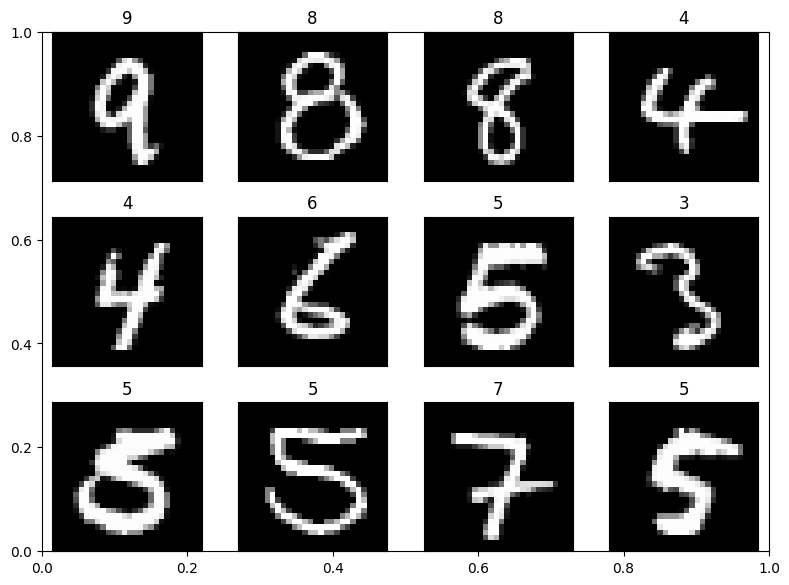

In [16]:
def plot_img(data,labels):
    num_img =12

    plt.subplots(figsize=(8,6))
    for  i in range(0,num_img):
        plt.subplot(3,4,i+1)
        plt.xticks([])
        plt.yticks([])

        rand = np.random.randint(0,len(data))
        img = data[rand]
        label = labels[rand]
        
        plt.imshow(img,cmap='gray')
        plt.title(labels[rand])

    plt.tight_layout()
    
    
    plt.show()

plot_img(X_train,y_train)

## Normalize

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train.shape

(60000, 28, 28)

In [31]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1)
X_test_reshape  =X_test.reshape(X_test.shape[0],-1)

In [35]:
X_train_reshape.shape,X_test_reshape.shape

((60000, 784), (10000, 784))

In [36]:
from keras.utils import to_categorical

In [37]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [39]:
y_train_new.shape,y_test_new.shape

((60000, 10), (10000, 10))

In [44]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [50]:
model = Sequential()

model.add(tf.keras.Input(shape =(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
history = model.fit(X_train_reshape,y_train_new,validation_data=(X_test_reshape,y_test_new),epochs = 10,batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9873 - loss: 0.0461 - val_accuracy: 0.9744 - val_loss: 0.1166
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9889 - loss: 0.0392 - val_accuracy: 0.9790 - val_loss: 0.1053
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9901 - loss: 0.0363 - val_accuracy: 0.9780 - val_loss: 0.1073
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9918 - loss: 0.0309 - val_accuracy: 0.9772 - val_loss: 0.1409
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9925 - loss: 0.0293 - val_accuracy: 0.9813 - val_loss: 0.1243
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9929 - loss: 0.0287 - val_accuracy: 0.9745 - val_loss: 0.1793
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9930 - loss: 0.0284 - val_accuracy: 0.9804 - val_loss: 0.1246
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9937 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


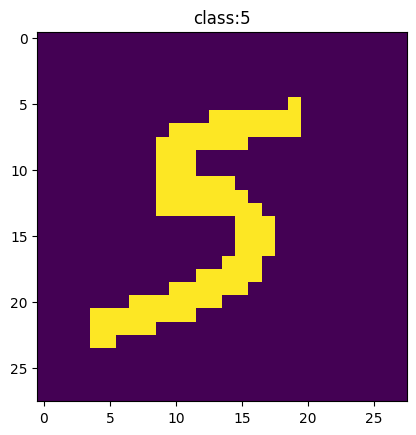

In [78]:
import cv2


img = cv2.imread(r"D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\new-char1.jpg",0)
img  = cv2.resize(img,(28,28))
_,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(img)
img = img.reshape(1,784)
pred = model.predict(img).argmax(axis=1)

plt.title(f'class:{pred[0]}')
plt.show()